# matplotlib

[Matplotlib](https://matplotlib.org/) es un paquete de Python para la visualización de datos (gráficos 2D/3D, animación, etc.). Proporciona gráficas con calidad de publicación en muchos formatos. 

En este cuaderno exploraremos matplotlib en modo interactivo, cubriendo los casos más comunes en la práctica.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

`pyplot` proporciona una interfaz conveniente para la biblioteca de trazado orientada a objetos matplotlib. La interfaz está modelada de manera similar a la de MATLAB. Por lo tanto, la mayoría de los comandos de trazado en pyplot tienen análogos de MATLAB con argumentos similares. Los comandos importantes se explican con ejemplos interactivos.

In [2]:
# check version
matplotlib.__version__

'3.5.0'

Veamos ahora una gráfica simple y entendamos los ingredientes que intervienen en la personalización de nuestra gráfica según deseemos.

## Gráfica de curva simple

In [11]:
def logistic(x0, r, n=100): 
    x = np.zeros(n)
    x[0] = x0
    for i in range(1,n):
        x[i] = r * x[i-1] * (1 - x[i-1])
    
    return x

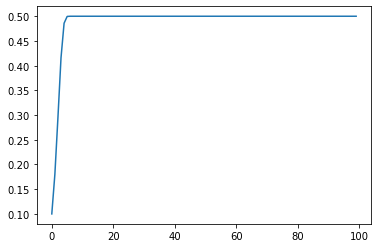

In [15]:
x = logistic(0.1, 2, 100)
plt.plot(x)

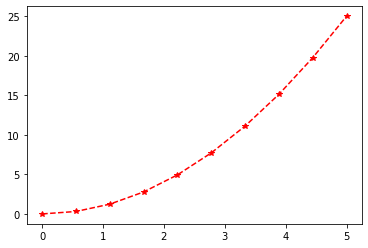

In [6]:
# get 10 linearly spaced points in the interval [0, 5)
x = np.linspace(0, 5, 10)
y = x ** 2

plt.plot(x, y, 'r--*')

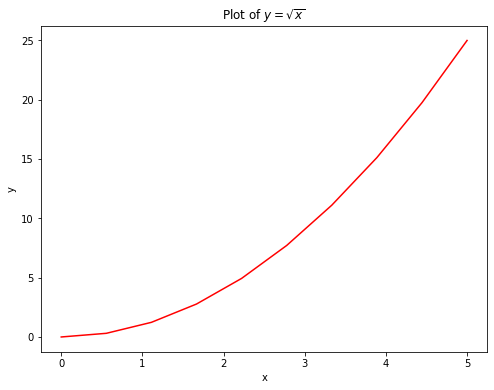

In [20]:
# get 10 linearly spaced points in the interval [0, 5)
x = np.linspace(0, 5, 10)
y = x ** 2

# create a figure/canvas of desired size
# figsize recibe el tamaño de la gráfica en pulgadas (horizontal, vertical)
plt.figure(figsize=(8, 6))

# plot values; with a color `red`
plt.plot(x, y, 'r')

# give labels to the axes
plt.xlabel('x')
plt.ylabel('y')

# give a title to the plot
plt.title(r"Plot of $y=\sqrt{x}$")
plt.show()

### Gráfica de coseno y seno

Comenzando con la configuración predeterminada, nos gustaría dibujar las funciones `coseno` y `seno` en el mismo gráfico. Luego, haremos que se vea más bonito personalizando la configuración predeterminada.

In [29]:
%matplotlib widget

# 256 linearly spaced values between -pi and +pi
# both endpoints would be included; check (X[0], X[-1])
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)

# compute cosine and sin values
C, S = np.cos(X), np.sin(X)

# plot both curves
plt.plot(X, C)
plt.plot(X, S)

# show the plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

La gráfica anterior no parece demasiado atractiva. Entonces, personalicemos un poco la configuración predeterminada.

*Matplotlib* permite especificar la relación de aspecto, DPI y el tamaño de la figura cuando se crea el objeto Figure, utilizando los argumentos de palabra clave `figsize` y `dpi`. 
- 'figsize' es una tupla del 'ancho' y 'alto' de la figura en **pulgadas**, y 
- 'dpi' son los puntos por pulgada (píxel por pulgada). 

Para crear una figura de 800x600 píxeles y 100 puntos por pulgada, podemos hacer lo siguiente:

In [31]:
# plt.figure?

In [34]:
# Create a new figure of size 800x600, using 100 dots per inch
plt.figure(figsize=(8, 6), dpi=100)

# Create a new subplot from a grid of 1x1
# plt.subplot(111)

# Now, plot `cosine` using `blue` color with a continuous line of width 1 (pixel)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# And plot `sine` using `green` color with a continuous line of width 1 (pixel)
plt.plot(X, S, color="green", linewidth=2.0, linestyle="--")

# Set x limits to [-4, +4]
plt.xlim(-4.0, 4.0)

# Set y limits to [-1, +1]
plt.ylim(-1.0, 1.0)

# optionally, save the figure as a pdf using 72 dots per inch
plt.savefig("./sine_cosine.png", format='png', dpi=72)

# show grid
plt.grid(True)

# Show the plot on the screen
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

--------

## Estableciendo límites de ejes

En lugar de codificar a mano los valores `xlim` y `ylim`, podemos tomar estos valores de la propia matriz y luego establecer los límites de manera programática.

También podemos cambiar los kwargs `linewidth` y `color` según deseemos.

In [35]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# customize color and line width
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

# set lower & upper bound by taking min & max value respectively
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

# optionally, save the figure as a pdf using 72 dots per inch
plt.savefig("./sine_cosine.pdf", format='pdf', dpi=80)

# show it on screen
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Estableciendo marcas (*ticks*) de los ejes

In [36]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# customize color and line width
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

# set lower & upper bound by taking min & max value respectively
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

# provide five tick values for x and 3 for y
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

# optionally, save the figure as a pdf using 72 dots per inch
plt.savefig("./sine_cosine.pdf", format='pdf', dpi=80)

# show it on screen
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Configuración de las etiquetas de marcas de los ejes (ticks)

Aunque arreglamos los *ticks* del eje, sus etiquetas aún no son muy explícitas. Podríamos suponer que 3.142 es $\pi$ pero sería mejor hacerlo explícito. Cuando establecemos valores para los *ticks*, también podemos proporcionar una etiqueta correspondiente en la segunda lista de argumentos. Tenga en cuenta que usaremos $\LaTeX$ para permitir una buena representación de la etiqueta.

In [37]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# customize color and line width
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-")

# set lower & upper bound by taking min & max value respectively
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

# provide five tick values for x and 3 for y
# and pass the corresponding label as a second argument.
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], # en donde se posicionan las marcas
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) # qué etiquetas se colocan

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

# optionally, save the figure as a pdf using 72 dots per inch
plt.savefig("./sine_cosine.pdf", format='pdf', dpi=80)

# show it on screen
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Agregar leyendas

In [40]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

# customize color and line width
# `label` is essential for `plt.legend` to work
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label=r"$\cos(x)$")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="sine")

# set lower & upper bound by taking min & max value respectively
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

# provide five tick values for x and 3 for y
# and pass the corresponding label as a second argument.
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
           [r'$-1$', r'$0$', r'$+1$'])

# show legend on the upper left side of the axes
plt.legend(loc='upper left', frameon=False)

# optionally, save the figure as a pdf using 72 dots per inch
plt.savefig("./sine_cosine.pdf", format='pdf', dpi=80)

# show it on screen
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

----------

## Figuras y subgráficas

**Figura**

Una figura son las ventanas en la GUI que tienen "Figura #" como título. Las figuras se numeran a partir del 1, a diferencia de la forma normal de indexar en Python, que comienza desde el 0. Hay varios parámetros que determinan el aspecto de la figura.


| Argument | Default       |Description |
|----------|:-------------:|------:|
| num   | 1             | number of figure |
| figsize  |figure.figsize | figure size in in inches (width, height)|
| dpi      |figure.dpi |   resolution in dots per inch|
|facecolor |figure.facecolor|color of the drawing background|
|edgecolor |figure.edgecolor|color of edge around the drawing background|
|frameon   |True            | draw figure frame or not |

**Gráfica secundaria**

Con subgráficas se puede organizar gráficas dentro de una cuadrícula regular. Debemos especificar el número de filas y columnas y el número de la gráfica actual.

![subplot-grid.png](images/matplotlib/subplot-grid.png)

![subplot-horizontal.png](images/matplotlib/subplot-horizontal.png)

![subplot-vertical.png](images/matplotlib/subplot-vertical.png)

La siguiente gráfica muestra cómo usar el *título de figura*, *etiquetas de eje* y *leyendas* en una subgráfica:

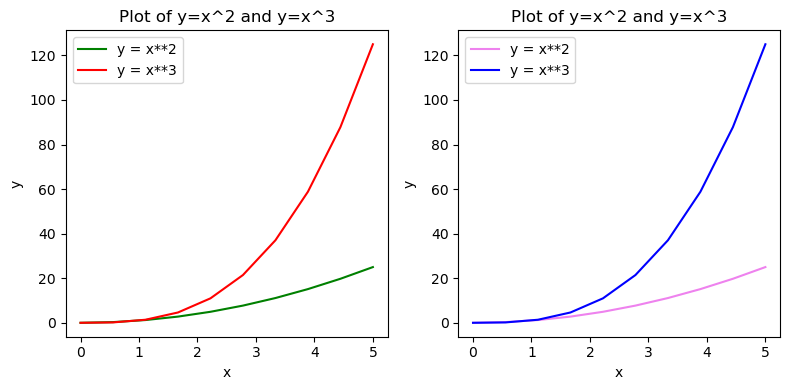

In [3]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi=100)

# plot subplot 1
axes[0].plot(x, x**2, color="green", label="y = x**2")
axes[0].plot(x, x**3, color="red", label="y = x**3")
axes[0].legend(loc=2); # upper left corner
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Plot of y=x^2 and y=x^3')

# plot subplot 2
axes[1].plot(x, x**2, color="violet", label="y = x**2")
axes[1].plot(x, x**3, color="blue", label="y = x**3")
axes[1].legend(loc=2); # upper left corner
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Plot of y=x^2 and y=x^3')

# `fig.tight_layout()` automatically adjusts the positions of the axes on the
# figure canvas so that there is no overlapping content comment this out to see
# the difference
fig.tight_layout()

plt.show()

## Formato de texto: LaTeX, tamaño de fuente, familia de fuentes

Matplotlib tiene un gran soporte para $\LaTeX$. Todo lo que necesitamos hacer es usar signos de dólar para encapsular LaTeX en cualquier texto (leyenda, título, etiqueta, etc.). Por ejemplo, `"$y=x^3$"`.

Pero aquí podríamos encontrarnos con un problema levemente sutil con el código $\LaTeX$ y las cadenas de texto de Python. En $\LaTeX$, usamos con frecuencia la barra invertida en los comandos, por ejemplo `\alpha` para producir el símbolo α. Pero la barra invertida ya tiene un significado en las cadenas de Python (el carácter del código de escape). 

Para evitar que Python arruine nuestro código de látex, **necesitamos usar cadenas de texto "en bruto"**. Las cadenas de texto sin formato se anteponen con una `'r'`, como `r"\alpha"` o `r'\alpha'` en lugar de `"\alpha"` o `'\alpha'`:

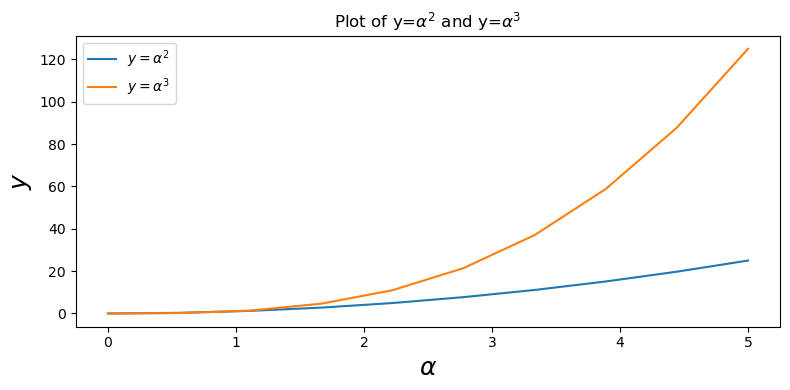

In [5]:
# Esta forma es la recomendada para hacer figuras
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18, fontweight='bold')
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title(r'Plot of y=$\alpha^{2}$ and y=$\alpha^{3}$')

fig.tight_layout()
plt.show()

In [8]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

## **Estilos de línea y marcador**

Para cambiar el ancho de línea, podemos usar el argumento de palabra clave `linewidth` o `lw`. El estilo de línea se puede seleccionar usando los argumentos de palabra clave `linestyle` o `ls`:

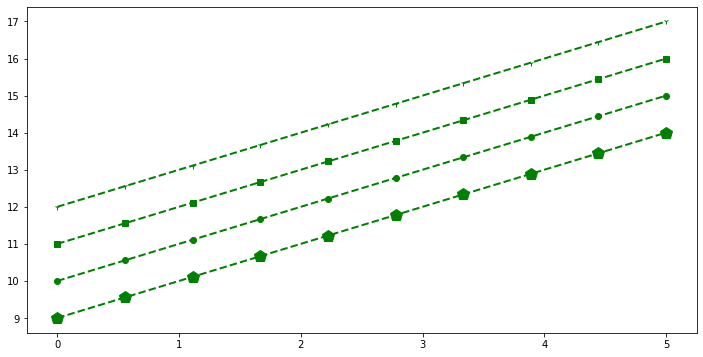

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker="p", markersize=12)
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

plt.show()

## Escala logarítmica

También es posible establecer una escala logarítmica para uno o ambos ejes. Esta funcionalidad es, de hecho, solo una aplicación de un sistema de transformación más general en Matplotlib. Cada una de las escalas de los ejes se establece por separado usando los métodos `set_xscale` y `set_yscale` que aceptan un parámetro (con el valor `"log"` en este caso):

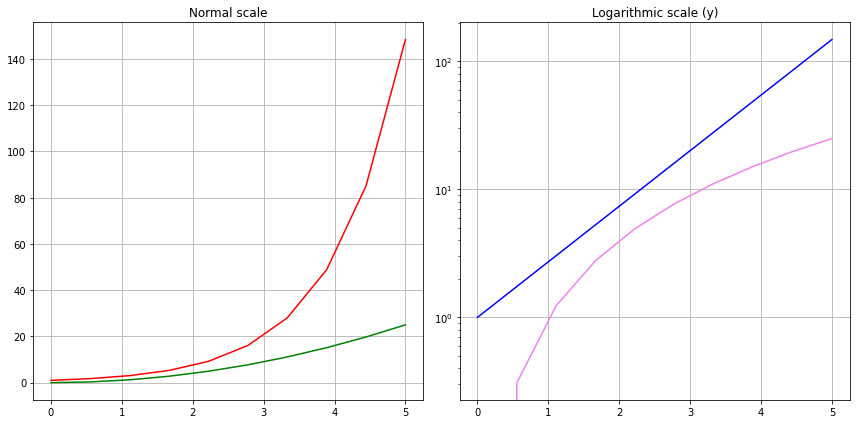

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot normal scale
axes[0].plot(x, np.exp(x), color="red")
axes[0].plot(x, x**2, color="green")
axes[0].set_title("Normal scale")
axes[0].grid()  # show grid

# plot `log` scale
axes[1].plot(x, np.exp(x), color="blue")
axes[1].plot(x, x**2, color="violet")
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")
axes[1].grid()  # show grid

fig.tight_layout()
plt.show()

## Gráfica de histograma de frecuencias

In [18]:
Axes.hist?

Object `Axes.hist` not found.


In [22]:
import seaborn as sns
sns.__version__

'0.11.0'

In [27]:
plt.style.use("ggplot")

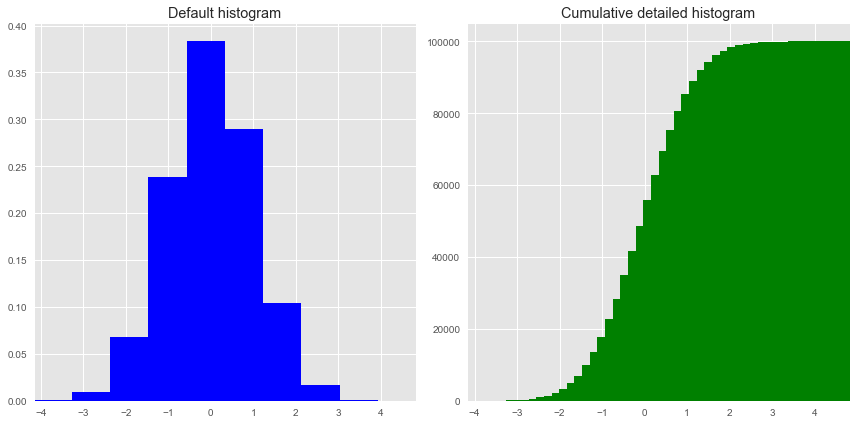

In [28]:
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot default histogram
axes[0].hist(n, color="blue", density=True)
axes[0].set_title("Default histogram")
axes[0].set_xlim((np.min(n), np.max(n)))

# plot cumulative histogram
axes[1].hist(n, cumulative=True, bins=50, color="green")
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((np.min(n), np.max(n)))

fig.tight_layout()
plt.show()

## Tipos comunes de gráficas

- **Gráfico de dispersión**
Un gráfico de dispersión simple de valores aleatorios extraídos de la distribución gaussiana estándar.

  - Note las propiedades `s` `c` y `alpha`.

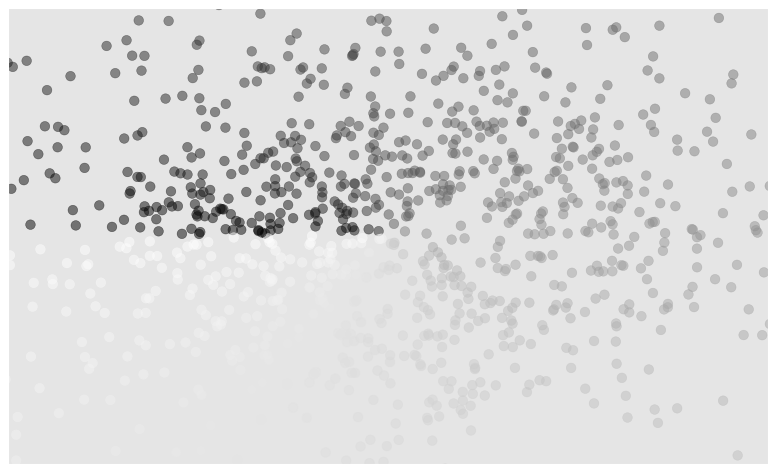

In [34]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

# color is given by the angle between X & Y
T = np.arctan2(Y,X)

plt.axes([0.025, 0.025, 0.95, 0.95])

# The alpha blending value, between 0 (transparent) and 1 (opaque).
# s - marker size
# c - color
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-2.0, 2.0), plt.xticks([])
plt.ylim(-2.0, 2.0), plt.yticks([])
plt.show()

In [31]:
type(plt.gcf())

matplotlib.figure.Figure

<Figure size 576x396 with 0 Axes>

In [36]:
plt.gca?

Signature: plt.gca(**kwargs)
Docstring:
Get the current Axes.

If there is currently no Axes on this Figure, a new one is created
using `.Figure.add_subplot`.  (To test whether there is currently an
Axes on a Figure, check whether ``figure.axes`` is empty.  To test
whether there is currently a Figure on the pyplot figure stack, check
whether `.pyplot.get_fignums()` is empty.)

The following kwargs are supported for ensuring the returned Axes
adheres to the given projection etc., and for Axes creation if
the active Axes does not exist:

Properties:
    adjustable: {'box', 'datalim'}
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
    alpha: scalar or None
    anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
    animated: bool
    aspect: {'auto', 'equal'} or float
    autoscale_on: bool
    autoscalex_on: bool
    autoscaley_on: bool
    axes_locator: Callable[[Axes, Renderer], Bbox]
    axisbelow: boo

--------

- **Gráfico de contorno**

Un gráfico de contorno representa una superficie tridimensional mediante el trazado de cortes transversales de $z$ constantes, llamados contornos, en una cuadrícula bidimensional.

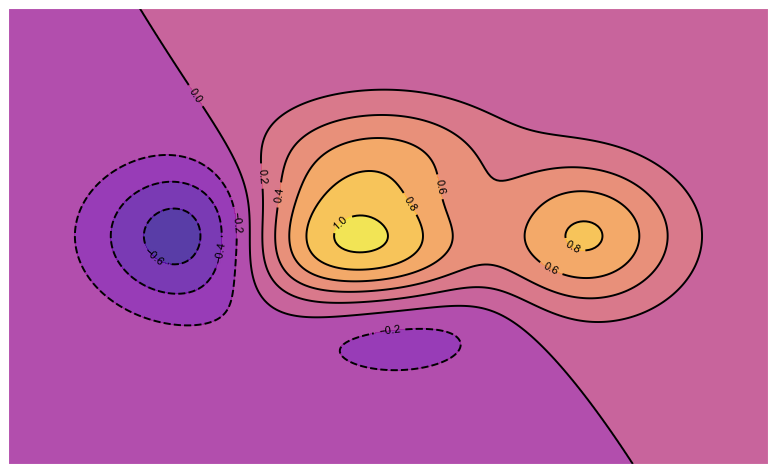

In [41]:
# set figure size and dpi (dots per inch)
plt.figure(figsize=(10, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(111)


def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.plasma)
C = plt.contour(X, Y, f(X,Y), 8, colors='black')
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
plt.show()

--------

- **Gráfica 3D**

Representar una superficie tridimensional. Para usar gráficos 3D en matplotlib, primero debemos crear una instancia de ejes de la clase `Axes3D`. Los ejes 3D se pueden agregar a un lienzo de figura matplotlib exactamente de la misma manera que los ejes 2D, pero una forma conveniente de crear una instancia de eje 3D es usar el argumento de palabra clave de proyección = '3d' para agregar <_> ejes o agregar <_>funciones de subgráfica.
  
Nota: por defecto, no es posible rotar la gráfica en el cuaderno jupyter. Trazarlo como un archivo o módulo independiente para hacer zoom y visualizarlo más dinámicamente girándolo.

C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_17060/578697792.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


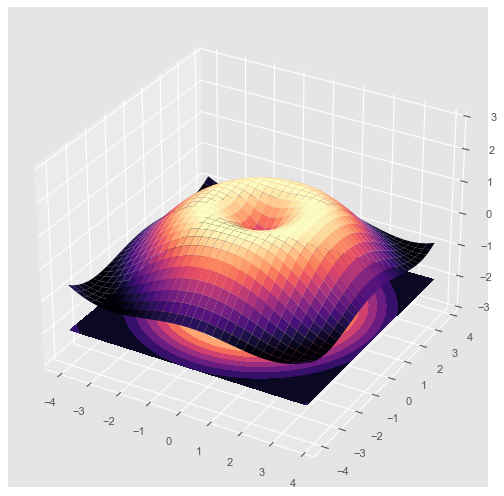

In [46]:
# create figure and set figure size and dpi (dots per inch)
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = Axes3D(fig)

# inputs
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)

X, Y = np.meshgrid(X, Y)

# 3D surface
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Métodos para graficar en un espacio tridimensional
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.magma)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.magma)

# set z axis limit
ax.set_zlim(-3, 3)

plt.show()

In [45]:
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)

def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

X, Y = np.meshgrid(X, Y)
f(X, Y)

array([[-1.37406196e-11, -7.05629231e-11, -3.15809916e-10, ...,
         8.67399712e-10,  2.47959669e-10,  5.94866748e-11],
       [-9.43884805e-11, -4.82929555e-10, -2.15004565e-09, ...,
         6.24859006e-09,  1.76329091e-09,  4.19793579e-10],
       [-5.72890327e-10, -2.92144892e-09, -1.29448728e-08, ...,
         3.94976668e-08,  1.10272199e-08,  2.60840069e-09],
       ...,
       [-2.87227206e-09, -1.42331726e-08, -6.04229722e-08, ...,
         2.65183505e-07,  6.91689368e-08,  1.56609120e-08],
       [-5.26714465e-10, -2.60092491e-09, -1.09814252e-08, ...,
         5.01119644e-08,  1.29906675e-08,  2.92892470e-09],
       [-8.51170673e-11, -4.18573192e-10, -1.75581513e-09, ...,
         8.37978012e-09,  2.15752143e-09,  4.84149942e-10]])

In [54]:
x = np.arange(0, 2*np.pi, 0.1)
# y = np.sin(x)
# plt.plot(np.sin)

--------

- **Gráfico de superficie 3D**

In [49]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

# def flux_qubit_potential(phi_m, phi_p):
#     return 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)
flux_qubit_potential = lambda phi_m, phi_p: 2 + alpha - 2 * np.cos(phi_p)*np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

C:\Users\Rodrigo\AppData\Local\Temp/ipykernel_17060/2757318751.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(p, shrink=0.5)


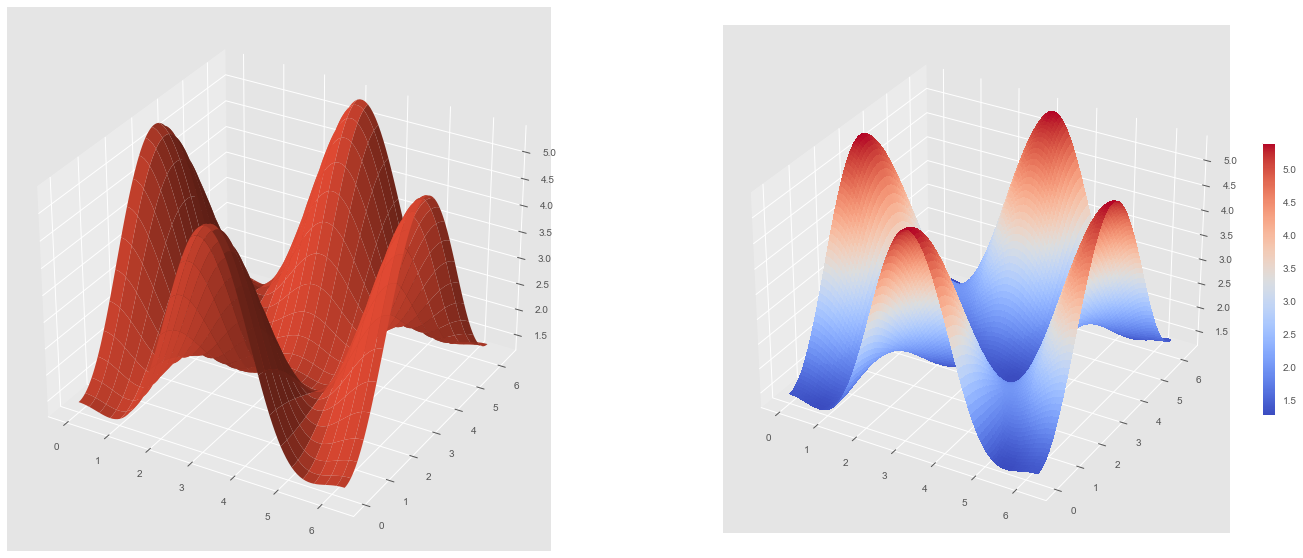

In [50]:
fig = plt.figure(figsize=(25, 10))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

plt.show()

--------

- **Gráfico de estructura alámbrica 3D**

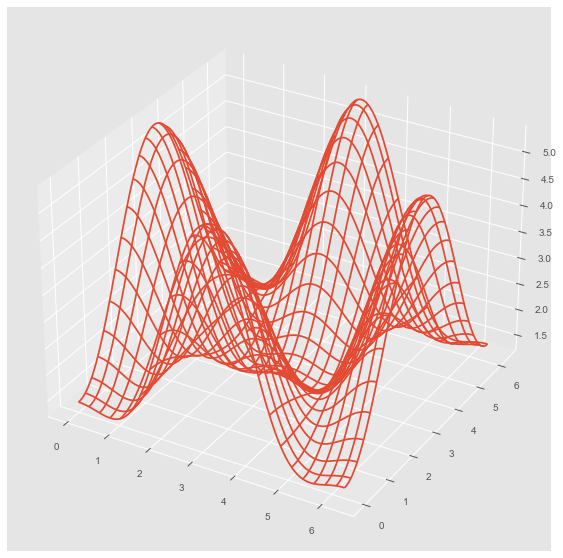

In [55]:
fig = plt.figure(figsize=(25, 10))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword
# argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

# create and plot a wireframe
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

plt.show()

--------

- Gráficos de curvas de nivel con proyecciones

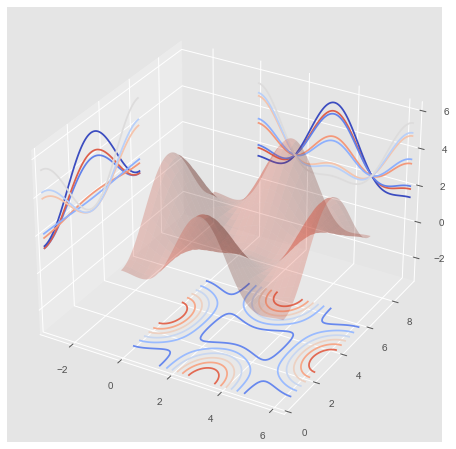

In [56]:
fig = plt.figure(figsize=(18, 8))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

plt.show()

**Cambio de ángulo de visión**
 - Podemos cambiar la perspectiva de un gráfico 3D usando la función `view_init`, que toma dos argumentos: la elevación y los ángulos de acimut (unidad de grados sexagesimales)

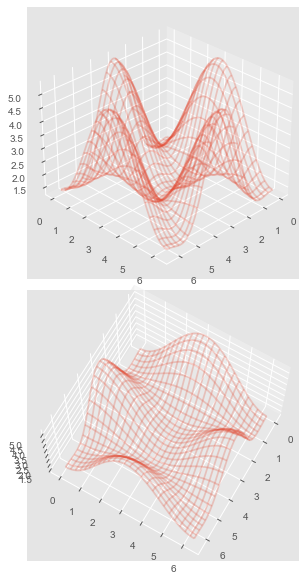

In [57]:
fig = plt.figure(figsize=(8, 8))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(2,1,2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

## Referencias

 - Adaptado de [Scipy-matplotlib-guide](http://www.scipy-lectures.org/intro/matplotlib/)

## Ejercicios



- Realizar con matplotlib el [diagrama de bifuración](https://es.wikipedia.org/wiki/Diagrama_de_bifurcaci%C3%B3n). 

- Con un DataFrame de pandas de ejemplo, realizar ejercicios con: 
  - una gráfica de líneas con alguna serie de tiempo. 
  - una gráfica de barras para alguna columna categórica.

In [58]:
import pandas as pd

In [62]:
dates = pd.date_range('2010-12', '2020-12', freq='Q')
df = pd.DataFrame({'date': ['2010-12-01', '2011-01-01', '2011-02-01'], 'x':np.random.rand(3)} )
df

,date,x
0,2010-12-01,0.117227
1,2011-01-01,0.287484
2,2011-02-01,0.174950


<AxesSubplot:xlabel='date'>

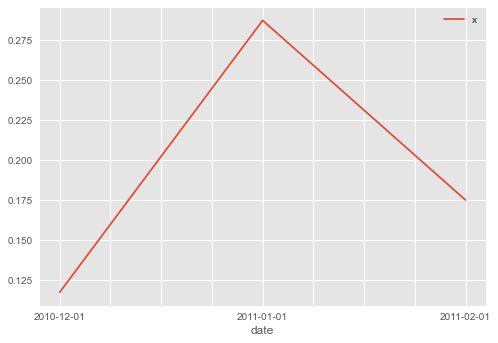

In [64]:
df.plot(x= 'date', y='x')
